## FIT5196 Assessment 2

Student Name: Jiawei Ren

Student ID:  32073119


## Library

In [1]:
#for dataframe 
import pandas as pd
#math for calculate the distance
from math import sin, cos, sqrt, atan2, radians
#these three are for linear regression modelling 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# find outliers
import numpy as np
#plot diagram
import matplotlib.pyplot as plt
%matplotlib inline

## Table of Contents

* [1. Dectect and fix errors in 32073119_dirty.csv](#1.0)
* [2. Detect and remove outlier rows in outlier.csv ](#2.0)
* [2. Impute the missing values in missing.csv](#3.0)

## Part1 : Dectect and fix errors in 32073119_dirty.csv <a class="anchor" name="1.0"></a>

1.1 **Load and Print data set**

In [2]:
# data is loaded from current working directory 
#load country data 
country =  pd.read_csv("countries.csv")
# load the data to df
df = pd.read_csv("32073119_dirty.csv")
#print first 10 rows
df.head(10)

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,distance,num_stops,has_loyalty,price_tier,price
0,IDXX93513,Adonis\AS-998,Ms. Johnna Johnson,F,2001-12-06,2021-05-24,2021-06-08,1,Croatia,Bulgaria,865.10,1,1,2,513.15
1,IDYY64279,Calisto\CS-120,Mr. Mark Ludeker,M,1986-02-11,2021-10-23,2022-09-18,1,Mongolia,Suriname,14048.36,1,0,2,2666.03
2,IDYY04574,Calisto\CS-368,Mr. Wayne Ruiz,M,2018-01-14,2021-02-23,2022-02-18,1,Burundi,Montenegro,5238.48,2,1,1,549.77
3,IDZZ04847,Omega\OG-052,Mr. Anthony Rader,M,2017-06-20,2021-01-30,2021-07-07,0,Panama,Jordan,12037.08,2,1,2,1469.49
4,IDXX97459,Adonis\AS-873,Ms. Kimberly Davis,F,1990-12-04,2021-03-06,2021-05-02,1,Belarus,Australia,13285.10,2,0,3,4277.56
5,IDYY79741,Calisto\CS-769,Mr. Leroy Bosco,M,2016-10-08,2021-02-01,2021-12-22,0,Austria,Paraguay,10735.40,1,1,1,1045.77
6,IDXX62278,Adonis\AS-531,Mr. Andrew Louis,M,1988-12-20,2021-09-24,2022-01-30,1,Kiribati,Uruguay,11940.80,1,0,2,2790.91
7,IDZZ33694,Omega\OG-039,Mr. Thomas Hardy,M,1983-06-09,2021-10-09,2022-06-02,1,Libya,Ecuador,10648.80,2,0,1,940.53
8,IDZZ18599,Omega\OG-314,Ms. Peggy Suarez,F,1982-06-28,2021-06-10,2021-11-06,1,Christmas Island,Mauritania,13186.47,1,1,2,1791.91
9,IDZZ72899,Omega\OG-141,Ms. Angela Murphy,F,2007-06-02,2021-09-25,2021-10-06,0,South Korea,Panama,14255.55,1,0,2,2010.43


* **Variable Types:**
    * Categorical variables: ticket_id, airline_flight, gender, is_adult, from, to, has_loyalty, name,num_stops
    * Ordinal variables: price_tier
    * Ratio: distance, price
    * Interval: dob, dop, dod
* **Numerical Features:**
    * continuous: distance, price
    

1.2 **Observe Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticket_id       500 non-null    object 
 1   airline_flight  500 non-null    object 
 2   name            500 non-null    object 
 3   gender          500 non-null    object 
 4   dob             500 non-null    object 
 5   dop             500 non-null    object 
 6   dod             500 non-null    object 
 7   is_adult        500 non-null    int64  
 8   from            500 non-null    object 
 9   to              500 non-null    object 
 10  distance        500 non-null    float64
 11  num_stops       500 non-null    int64  
 12  has_loyalty     500 non-null    int64  
 13  price_tier      500 non-null    int64  
 14  price           500 non-null    float64
dtypes: float64(2), int64(4), object(9)
memory usage: 58.7+ KB


In [4]:
df.describe()

,is_adult,distance,num_stops,has_loyalty,price_tier,price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.588000,8657.409860,1.234000,0.496000,1.706000,1464.274200
std,0.492688,4663.799029,0.732336,0.500485,0.547873,834.911137
min,0.000000,372.350000,0.000000,0.000000,1.000000,227.280000
25%,0.000000,4897.957500,1.000000,0.000000,1.000000,868.090000
50%,1.000000,8402.530000,1.000000,0.000000,2.000000,1259.140000
75%,1.000000,12084.580000,2.000000,1.000000,2.000000,1904.547500
max,1.000000,19651.630000,2.000000,1.000000,3.000000,5410.370000


In [5]:
print(df.num_stops.value_counts())
print(df.gender.value_counts())
print(df.price_tier.value_counts())
print(df.has_loyalty.value_counts())
print(df.is_adult.value_counts())

2    206
1    205
0     89
Name: num_stops, dtype: int64
F    258
M    242
Name: gender, dtype: int64
2    307
1    170
3     23
Name: price_tier, dtype: int64
0    252
1    248
Name: has_loyalty, dtype: int64
1    294
0    206
Name: is_adult, dtype: int64


* According to the tables:
    * There are 500 samples and no missing value
    * is_adult and has_loyalty are categorical feature with 0 or 1
    * price_tier is ordinal, from 1 - 3
    * the max num_stops is 2
    * distance and price varies significantly 

In [6]:
df.describe(include=['O'])

,ticket_id,airline_flight,name,gender,dob,dop,dod,from,to
count,500,500,500,500,500,500,500,500,500
unique,500,461,497,2,491,274,337,212,214
top,IDYY33374,Calisto\CS-600,Mr. Jimmy Corf,F,1983-06-09,2021-01-17,2021-12-22,Zimbabwe,Suriname
freq,1,3,2,258,2,5,4,7,8


* This table tells me:
    * there are 500 unique ticket_id which makes sense, because we should not have duplicate ID
    * we only have 461 unique flights, probably because one flight sold multiple tickets and the max frequency is 3
    * we have 497 passengers, Jimmy Corf probably bought two tickets
    * We have two genders, M and F
    * only 491 unique date of birth, probably Some people were born on the same day
    * plane may depature or arrive on the same day
    * we have 212 depature countries and 214 destination countries

1.3 **Find Anomalies**

#### Are all airline name consistent?

In [7]:
error_found = 0
# Lets seperate the airline name from the flight
airline = df['airline_flight'].apply(lambda s: pd.Series({'airline': s.split("-")[0].strip(),
                            'number':s.split("-")[1].strip()}))
print(airline.airline.value_counts())

Adonis\AS     175
Calisto\CS    165
Omega\OG      155
Omega\AS        1
Adonis\CS       1
Calisto\cs      1
Adonis\cs       1
Omega\og        1
Name: airline, dtype: int64


The output shows there are lexical errors:

* typos: 
    * Omega\OG VS Omega\AS
    * Adonis\AS VS Adonis\cs
    * Adonis\AS VS Adonis\CS 
* Inconsistent Spelling:
    * Omega\OG VS Omega\og
    * Calisto\CS VS Calisto\cs
    
   
Assume spelling with large count is correct        

In [8]:
#since there will be no more than 1 error in each row, so I use this list to record which has error
row_error = []
row_error.append(airline[airline['airline'] == "Omega\AS"].index[0])
row_error.append(airline[airline['airline'] == "Calisto\cs"].index[0])
row_error.append(airline[airline['airline'] == "Omega\og"].index[0])
row_error.append(airline[airline['airline'] == "Adonis\CS"].index[0])
row_error.append(airline[airline['airline'] == "Adonis\cs"].index[0])
# fix errors:
airline["airline"].replace({"Omega\AS":"Omega\OG","Adonis\cs":"Adonis\AS",
                            "Adonis\CS":"Adonis\AS","Omega\og":"Omega\OG","Calisto\cs":"Calisto\CS",
                            "Omega\OG":"Omega\OG"},inplace=True)
df["airline_flight"] = airline["airline"] + "-" + airline["number"]

#### Are all title consistent?

In [9]:
names = df['name'].apply(lambda s: pd.Series({'title': s.split(".")[0].strip(),
                            'name':s.split(".")[1].strip()}))
names["gender"] = df.gender
names.title.value_counts()

Ms    252
Mr    248
Name: title, dtype: int64

Looks like the title is consistent

#### How about gender and title?

In [10]:
count = names[((names.title == "Ms") & (names.gender != "F")) | ((names.title == "Mr") & (names.gender != "M"))].index
print( "So we found {} passengers' gender were wrong, according to note 9,name is error-free, so title should be fine".
      format(len(count)))
row_error = row_error + list(count)

So we found 10 passengers' gender were wrong, according to note 9,name is error-free, so title should be fine


In [11]:
#lets fix it
names.gender = names.title
names.gender.replace({"Ms":"F","Mr":"M"},inplace=True)
df.gender = names.gender

###### Is the record for is_adults correct?

Assuming age 16+ is an adult and age of passenger is determined by using dop minus dob

In [12]:
#by observing the dataframe, I can see the date is in Y-m-d format
#I also realise that the data format is not consistent, 
#so I will use following code to check which cell has the wrong format
df['check'] = pd.to_datetime(df.dob,format='%Y-%m-%d',errors='coerce')
print("I found {} errors and let's have a look at them ".format(df.check.isna().sum()))
df[df.check.isna()].dob

I found 6 errors and let's have a look at them 


32                   1992-15-10
37                   2003-15-01
238                  2013-27-12
368    Mon Aug  2 00:00:00 2021
459                 2007-Aug-02
468    Sun Sep  8 00:00:00 1991
Name: dob, dtype: object

In [13]:
#lets fix them one by one
df.at[32,'check'] = pd.to_datetime(df.dob[32],format='%Y-%d-%m')
df.at[37,'check'] =  pd.to_datetime(df.dob[37],format='%Y-%d-%m')
df.at[238,'check'] =  pd.to_datetime(df.dob[37],format='%Y-%d-%m')
df.at[368,'check'] =   pd.to_datetime(df.dob[368])
df.at[459,'check'] =   pd.to_datetime(df.dob[459])
df.at[468,'check'] =   pd.to_datetime(df.dob[468])
#discard the check column and update dob
df.dob = df.check
df.drop('check', inplace=True, axis=1)
print("Then check dop")
row_error = row_error + [32,37,238,368,459,468]

Then check dop


In [14]:
df['check'] = pd.to_datetime(df.dop,format='%Y-%m-%d',errors='coerce')
print("I found {} errors and let's have a look at them ".format(df.check.isna().sum()))
df[df.check.isna()].dop

I found 5 errors and let's have a look at them 


149    2021-30-05
237    2021-18-02
382    2021-13-03
443    2021-23-04
491    2021-13-06
Name: dop, dtype: object

In [15]:
#lets fix them one by one
df.at[149,'check'] =   pd.to_datetime(df.dop[149],format='%Y-%d-%m')
df.at[237,'check'] =   pd.to_datetime(df.dop[237],format='%Y-%d-%m')
df.at[382,'check'] =   pd.to_datetime(df.dop[382],format='%Y-%d-%m')
df.at[443,'check'] =   pd.to_datetime(df.dop[443],format='%Y-%d-%m')
df.at[491,'check'] =   pd.to_datetime(df.dop[491],format='%Y-%d-%m')
#discard the check column and update dop
df.dop = df.check
df.drop('check', inplace=True, axis=1)
print("Then check dod") 

Then check dod


In [16]:
df['check'] = pd.to_datetime(df.dod,format='%Y-%m-%d',errors='coerce')
print("I found {} errors and let's have a look at them ".format(df.check.isna().sum()))
df[df.check.isna()].dod

I found 6 errors and let's have a look at them 


11     Fri Mar 11 00:00:00 2022
40     Sun Nov  7 00:00:00 2021
112    Sat Sep 11 00:00:00 2021
315                 2022-Jan-03
401    Tue Oct 12 00:00:00 2021
467                 2022-Feb-09
Name: dod, dtype: object

In [17]:
#lets fix them one by one
df.at[11,'check'] =   pd.to_datetime(df.dod[11])
df.at[40,'check'] =   pd.to_datetime(df.dod[40])
df.at[112,'check'] =   pd.to_datetime(df.dod[112])
df.at[315,'check'] =   pd.to_datetime(df.dod[315])
df.at[401,'check'] =   pd.to_datetime(df.dod[401])
df.at[467,'check'] =   pd.to_datetime(df.dod[467])
#discard the check column and update dod
df.dod = df.check
df.drop('check', inplace=True, axis=1)
row_error = row_error + [11,40,112,315,401,467]

In [18]:
#assume 1 year = 365 days
#lets check is_adult
error_count=0
for i in range(500):
    #if it is less than 16 and is_adult =1
    if (0 <((df.dop[i] - df.dob[i]).days/365) <16) and df.is_adult[i] ==1:
        df.at[i,'is_adult'] = 0
        error_count += 1
        row_error.append(i)
    #just want to see if there is any errors that dop greater than dob or dod greater than dop
    if (df.dop[i] - df.dob[i]).days <0 or (df.dod[i] - df.dop[i]).days <0:
        row_error.append(i)
        print("row:",i)
        print(df.dob[i]," | ",df.dop[i]," | ",df.dod[i]," | ",df.is_adult[i])

row: 53
2021-09-09 00:00:00  |  2021-01-05 00:00:00  |  2021-04-12 00:00:00  |  0
row: 103
2021-05-01 00:00:00  |  2021-01-26 00:00:00  |  2021-10-22 00:00:00  |  0
row: 104
2021-12-30 00:00:00  |  2021-03-29 00:00:00  |  2021-10-02 00:00:00  |  0
row: 114
2021-08-17 00:00:00  |  2021-04-08 00:00:00  |  2021-09-30 00:00:00  |  0
row: 436
2021-11-14 00:00:00  |  2021-04-07 00:00:00  |  2021-06-26 00:00:00  |  0
row: 447
2021-09-03 00:00:00  |  2021-08-07 00:00:00  |  2022-01-09 00:00:00  |  0


Also this is what it looks like in the dirty.csv file, so it's not a bug from changing the date format

The problem here is dop, even some dods predate dob. So I Google: 

"Booking a flight to include a child not born yet?"

and "Do I need to buy an extra ticket if my child is born on the plane?", the answer is no.

So what I can do here is either remove this rows or switch cells to make them reasonable and I decided to switch them

In [19]:
#lets fix them one by one
#dob will be the earliest date, then dop and dod
rows = [53,103,104,114,436,447]
for row in rows:
    fix = [df.dob[row],df.dod[row],df.dop[row]]
    fix.sort()
    df.at[row,'dob'] = fix[0]
    df.at[row,'dop'] = fix[1]
    df.at[row,'dod'] = fix[2]

#### How about duplicate data?|

In [20]:
df[df.duplicated(["name"], keep=False)]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,distance,num_stops,has_loyalty,price_tier,price
66,IDYY50245,Calisto\CS-563,Ms. Rebecca Long,F,1992-01-03,2021-05-07,2021-11-12,1,Armenia,Spain,4089.86,1,1,1,676.12
119,IDYY38085,Calisto\CS-645,Mr. Jimmy Corf,M,2012-04-25,2021-08-19,2021-09-21,0,Poland,Tuvalu,14674.56,2,0,2,2530.23
125,IDXX33456,Adonis\AS-919,Ms. Josefa Winkler,F,1998-02-04,2021-06-19,2021-08-04,1,Czech Republic,Lithuania,823.34,2,0,2,463.84
178,IDXX17747,Adonis\AS-841,Mr. Jimmy Corf,M,2019-03-06,2021-09-16,2022-05-03,0,Tuvalu,Burundi,16266.82,2,0,1,1819.01
272,IDYY43295,Calisto\CS-440,Ms. Josefa Winkler,F,1997-08-15,2021-04-19,2021-08-02,1,Mexico,Kenya,15023.68,1,1,2,2537.75
317,IDXX11351,Adonis\AS-371,Ms. Rebecca Long,F,2014-04-23,2021-11-10,2022-09-22,0,South Africa,Finland,10298.12,1,0,1,1332.06


They all have different date of birth, I assume they are different person and data is fine

 
#### How about distance?

country in dirty.csv is error free and no error in countries.csv, so we can use longitude and latitude to check the distance

In [21]:
country.head(10)

,name,country,latitude,longitude
0,Andorra,AD,42.546245,1.601554
1,United Arab Emirates,AE,23.424076,53.847818
2,Afghanistan,AF,33.939110,67.709953
3,Antigua and Barbuda,AG,17.060816,-61.796428
4,Anguilla,AI,18.220554,-63.068615
5,Albania,AL,41.153332,20.168331
6,Armenia,AM,40.069099,45.038189
7,Netherlands Antilles,AN,12.226079,-69.060087
8,Angola,AO,-11.202692,17.873887
9,Antarctica,AQ,-75.250973,-0.071389


(array([  1.,   1.,   1.,   1.,   1.,   0.,   0., 494.,   0.,   1.]),
 array([-10105.03386492,  -8690.60120336,  -7276.16854181,  -5861.73588025,
         -4447.30321869,  -3032.87055714,  -1618.43789558,   -204.00523402,
          1210.42742753,   2624.86008909,   4039.29275065]),
 <BarContainer object of 10 artists>)

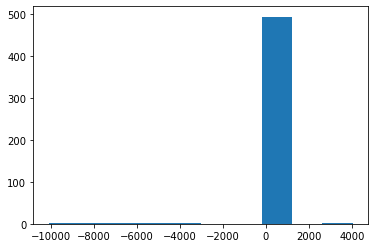

In [22]:
# = radius of earth in km
R = 6378
difference = []
#see reference
# the formula is found online, is about using latitude and longitude to calculate the distance
for row in range(500):
    lat1 = radians(country[country.name == df["from"][row]].latitude)
    long1 = radians(country[country.name == df["from"][row]].longitude)
    lat2 = radians(country[country.name == df["to"][row]].latitude)
    long2 = radians(country[country.name == df["to"][row]].longitude) 
    dlon = long2 - long1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    d = distance - df["distance"][row]
    difference.append(d) 
plt.hist(difference)

In [23]:
# lets see how many errors
count = 0
for i in range(500):
    if abs(difference[i]) > 1:
        df.at[i,'distance'] = df.distance[i] + difference[i]
        row_error.append(i)
        count += 1
print("I found that {} values differ by more than 1, the rest are so small that I will ignore them".
      format(count))

I found that 6 values differ by more than 1, the rest are so small that I will ignore them


#### How about price tier?

In [24]:
#according to note 6, dpbd = dod-dop
count = 0
for i in range(500):
    dpbd = (df.dod[i]-df.dop[i]).days
    if dpbd >= 180:
        #if it is weekend and price tier is not equals to 2
        if df.dod[i].weekday() in [5,6] and df.price_tier[i] !=2:
            count +=1
            df.at[i,"price_tier"] = 2
        #if not traveled on weekend and price tier is not 1
        elif df.dod[i].weekday() not in [5,6] and df.price_tier[i] !=1:
            count +=1
            df.at[i,"price_tier"] = 1
    elif dpbd < 180:
        if dpbd <= 60:
            #if traveled on weekend and price tier is not equals to 3
            if df.dod[i].weekday() in [5,6] and df.price_tier[i] !=3:
                count +=1
                df.at[i,"price_tier"] = 3
             #if not traveled on weekend and price tier is not 2
            elif df.dod[i].weekday() not in [5,6] and df.price_tier[i] !=2:
                count +=1
                df.at[i,"price_tier"] = 2
        else:
            if df.price_tier[i] !=2:
                count +=1
                df.at[i,"price_tier"] = 2
print("Found {} errors".format(count))

Found 8 errors


#### How about has_loyalty

price factors:
* different for each airline
* If the customer is a member of a loyalty program, the price of the ticket has a 10% discount applied
* The interaction between price_tier and distance (i.e. price_tier * distance)
* The number of stops/transits during the flight
* Whether the traveller is an adult on the day of departure (i.e. 16 years or above).

In [25]:

# extract data by airline , create a column for interaction
df["airline"] = airline["airline"]
df['interaction'] = df["distance"] * df["price_tier"]
# linear regression is an equation like y = ax1+bx2+ ....+cxn +c, so discount cant be one of the factor
df['origin_price'] = ''
for i in range(500):
    if df["has_loyalty"][i] == 1:
        df.at[i,'origin_price'] =df.price[i] /0.9 
    else:
        df.at[i,'origin_price'] = df.price[i]
Omega= df[df['airline'] =='Omega\OG']
Calisto= df[df['airline'] == 'Calisto\CS']
Adonis = df[df['airline'] == 'Adonis\AS']
# lets train Adonis first, I could set Adonis =1 Omega =2 and Calisto =3 and train them all together 
#but this results in a lower r-squared
X_train, X_test, y_train, y_test = train_test_split(Adonis[['is_adult','num_stops','interaction']],
                                                    Adonis.origin_price, random_state = 111)

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)
# I got 0.99, a high R-squared 
print ('r-squared for this model = ',lr.score(X_test,y_test))

r-squared for this model =  0.9973454947512911


In [27]:
# in Price, the discount is applied already
# Therefore, if the predicted price is 10% higher than the price, the has_loyalty should be 1
print("value fixed:")
for i in Adonis.index:
    factor = [Adonis.is_adult[i],Adonis.num_stops[i],Adonis.interaction[i]]
    predict= lr.predict([factor])
    if ( (predict[0]/Adonis.price[i])-1 >= 0.10) and df.has_loyalty[i] != 1:
        row_error.append(i)
        print("row:",i,"factors:",factor,"estimated price:",predict[0],"actual price:",
              Adonis.price[i],"loyalty:",Adonis.has_loyalty[i])
        df.at[i,"has_loyalty"] = 1

value fixed:
row: 103 factors: [0, 0, 8220.18] estimated price: 1226.7692167116468 actual price: 804.63 loyalty: 0


In [28]:
#omega:
X_train, X_test, y_train, y_test = train_test_split(Omega[['is_adult','num_stops','interaction']],
                                                    Omega.origin_price, random_state = 111)
lr = LinearRegression()
lr.fit(X_train,y_train)
# I got 0.99, a high R-squared 
print ('r-squared for this model = ',lr.score(X_test,y_test))

r-squared for this model =  0.9980777056705425


In [29]:
print("value fixed:")
for i in Omega.index:
    factor = [Omega.is_adult[i],Omega.num_stops[i],Omega.interaction[i]]
    predict= lr.predict([factor])
    if ( (predict[0]/Omega.price[i])-1 >= 0.10) and df.has_loyalty[i] != 1:
        row_error.append(i)
        print("row:",i,"factors:",factor,"estimated price:",predict[0],"actual price:",
              Omega.price[i],"loyalty:",Omega.has_loyalty[i])
        df.at[i,"has_loyalty"] = 1

value fixed:
row: 76 factors: [0, 2, 570.94] estimated price: 252.41801531669472 actual price: 227.28 loyalty: 0
row: 289 factors: [1, 2, 21670.74] estimated price: 1600.1175967460451 actual price: 1436.67 loyalty: 0
row: 445 factors: [0, 2, 744.7] estimated price: 262.79250218148627 actual price: 232.19 loyalty: 0


In [30]:
#Calisto:
X_train, X_test, y_train, y_test = train_test_split(Calisto[['is_adult','num_stops','interaction']],
                                                    Calisto.origin_price, random_state = 111)
lr = LinearRegression()
lr.fit(X_train,y_train)
# I got around 0.99, a high R-squared 
print ('r-squared for this model = ',lr.score(X_test,y_test))

r-squared for this model =  0.9992125212196852


In [31]:
print("value fixed:")
for i in Calisto.index:
    factor = [Calisto.is_adult[i],Calisto.num_stops[i],Calisto.interaction[i]]
    predict= lr.predict([factor])
    if ( (predict[0]/Calisto.price[i])-1 >= 0.10) and df.has_loyalty[i] != 1:
        row_error.append(i)
        print("row:",i,"factors:",factor,"estimated price:",predict[0],"actual price:",Calisto.price[i],
              "loyalty:",Calisto.has_loyalty[i])
        df.at[i,"has_loyalty"] = 1

value fixed:
row: 341 factors: [1, 1, 7585.27] estimated price: 1027.6886299512678 actual price: 924.13 loyalty: 0
row: 449 factors: [0, 1, 2876.64] estimated price: 536.8160868889079 actual price: 480.13 loyalty: 0


In [32]:
df.drop('interaction', inplace=True, axis=1)
df.drop('origin_price', inplace=True, axis=1)
df.drop('airline', inplace=True, axis=1)
df.head(5)

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,distance,num_stops,has_loyalty,price_tier,price
0,IDXX93513,Adonis\AS-998,Ms. Johnna Johnson,F,2001-12-06,2021-05-24,2021-06-08,1,Croatia,Bulgaria,865.10,1,1,2,513.15
1,IDYY64279,Calisto\CS-120,Mr. Mark Ludeker,M,1986-02-11,2021-10-23,2022-09-18,1,Mongolia,Suriname,14048.36,1,0,2,2666.03
2,IDYY04574,Calisto\CS-368,Mr. Wayne Ruiz,M,2018-01-14,2021-02-23,2022-02-18,0,Burundi,Montenegro,5238.48,2,1,1,549.77
3,IDZZ04847,Omega\OG-052,Mr. Anthony Rader,M,2017-06-20,2021-01-30,2021-07-07,0,Panama,Jordan,12037.08,2,1,2,1469.49
4,IDXX97459,Adonis\AS-873,Ms. Kimberly Davis,F,1990-12-04,2021-03-06,2021-05-02,1,Belarus,Australia,13285.10,2,0,3,4277.56


#### at this point, part 1 is finished

In [33]:
#output
df.to_csv('32073119_dirty_solution.csv')

## Part2 : Detect and remove outlier rows in outlier.csv <a class="anchor" id="2.0"></a>

* outliers are to be found w.r.t. price attribute
* There are no data anomalies in the file outlier.csv except for outliers

2.1 **Load and Print data set**

In [34]:
# load the data to df_outlier from current working directory
df_outlier = pd.read_csv("32073119_outlier.csv")
#print first 10 rows
df_outlier.head(10)

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,distance,num_stops,has_loyalty,price_tier,price
0,IDYY07721,Calisto\CS-179,Mr. Todd Alonso,M,1985-05-03,2021-06-23,2022-04-19,1,Armenia,United Kingdom,3909.20,2,1,1,552.36
1,IDXX24961,Adonis\AS-428,Mr. John Dunaway,M,1998-06-20,2021-05-30,2022-05-23,1,Qatar,Guinea-Bissau,7096.83,1,0,1,1117.48
2,IDYY44622,Calisto\CS-803,Ms. Christina Mcnally,F,1995-07-07,2021-01-21,2021-08-03,1,New Zealand,Dominica,13955.27,1,0,1,1536.30
3,IDXX59704,Adonis\AS-157,Mr. Raymond Given,M,1994-06-07,2021-04-10,2022-04-02,1,Moldova,Cook Islands,17032.62,2,0,2,3700.15
4,IDZZ19210,Omega\OG-345,Ms. Mildred Boulos,F,2003-04-10,2021-03-08,2021-06-17,1,Ecuador,Eritrea,13072.36,1,0,2,1981.32
5,IDXX55780,Adonis\AS-960,Ms. Gloria Frisbee,F,1990-05-09,2021-12-22,2022-08-02,1,Togo,Pakistan,7476.30,0,1,1,1126.28
6,IDXX50432,Adonis\AS-413,Ms. Nancy Atkin,F,1983-04-17,2021-11-09,2022-04-27,1,Austria,Georgia,2328.74,2,1,2,691.76
7,IDXX61315,Adonis\AS-771,Mr. William Pollock,M,2008-10-31,2021-06-20,2021-11-30,0,Maldives,Nicaragua,17056.16,2,1,2,3246.21
8,IDZZ49599,Omega\OG-623,Mr. Craig Carter,M,1988-12-19,2021-11-03,2022-01-26,1,Chile,Tunisia,11437.22,1,1,2,1605.57
9,IDXX73762,Adonis\AS-801,Mr. James Waters,M,2008-02-06,2021-03-28,2021-10-02,0,Tuvalu,Serbia,15342.64,2,0,2,3278.88


2.2 **Find Outliers and Remove Row**

Given outliers are only present in the price column and no other anomalies

In [35]:
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticket_id       500 non-null    object 
 1   airline_flight  500 non-null    object 
 2   name            500 non-null    object 
 3   gender          500 non-null    object 
 4   dob             500 non-null    object 
 5   dop             500 non-null    object 
 6   dod             500 non-null    object 
 7   is_adult        500 non-null    int64  
 8   from            500 non-null    object 
 9   to              500 non-null    object 
 10  distance        500 non-null    float64
 11  num_stops       500 non-null    int64  
 12  has_loyalty     500 non-null    int64  
 13  price_tier      500 non-null    int64  
 14  price           500 non-null    float64
dtypes: float64(2), int64(4), object(9)
memory usage: 58.7+ KB


We have 500 rows

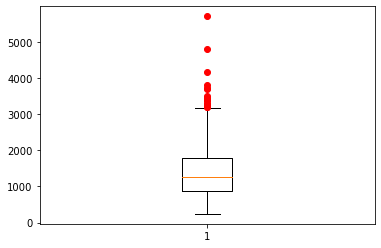

In [36]:
bp = plt.boxplot(df_outlier.price, 0, 'ro') 

Those red points are outliers, I am going to use **1.5 IQR rule** to filter them 


In [37]:
#sort price in an increasing order
df_outlier.sort_values('price')
#acquire 25% and 75% quantile
q1, q3= np.percentile(df_outlier['price'],[25,75])
print("25% percentiles :",q1,"   75% percentiles :",q3)

25% percentiles : 868.715    75% percentiles : 1793.2549999999999


In [38]:
#now we can find the IQR, which is q3 - q1
iqr = q3-q1
print("interquartile range is:", iqr)

interquartile range is: 924.5399999999998


In [39]:
#then higher bound and lower bound values
lower = q1 -(1.5 * iqr) 
upper = q3 +(1.5 * iqr) 
print('lower bound value is:', lower,'  upper bound value is:',upper)
print("according to the boxplot, there are no negative values, so any value that is greater than upper bound is an outlier")

lower bound value is: -518.0949999999997   upper bound value is: 3180.0649999999996
according to the boxplot, there are no negative values, so any value that is greater than upper bound is an outlier


In [40]:
remove_list = []
for i in range(500):
    if df_outlier.price[i] > upper:
        remove_list.append(i)
df_outlier.drop(df_outlier.index[remove_list],inplace=True)
print('There are {} outliers'.format(len(remove_list)))


There are 19 outliers


In [41]:
#output
df_outlier.reset_index(drop=True, inplace=True)
df_outlier.to_csv('32073119_outlier_solution.csv')


## Part3: Impute the missing values in missing.csv  <a class="anchor" id="3.0"></a>

* There are no data anomalies in missing.csv except for missing data.

In [42]:
#load data from current working directory 
df_missing = pd.read_csv("32073119_missing.csv")
df_missing.head(5)

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,distance,num_stops,has_loyalty,price_tier,price
0,IDZZ87758,Omega\OG-289,Mr. Patrick Morris,M,2021-02-17,2021-01-08,2021-12-14,0,Cape Verde,Macedonia [FYROM],5210.04,1,1,1,NaN
1,IDZZ94121,Omega\OG-438,Ms. Sophia Maggard,F,1986-09-22,2021-04-20,2021-08-15,1,Cocos [Keeling] Islands,Niue,9915.10,0,1,2,NaN
2,IDZZ04099,Omega\OG-164,Ms. Grace Ziegler,F,1990-12-01,2021-12-09,2022-09-08,1,Angola,Montserrat,9340.15,1,0,1,NaN
3,IDZZ36820,Omega\OG-547,Ms. Krista Jones,F,1989-01-01,2021-07-23,2022-01-23,1,Liechtenstein,Liberia,4883.13,2,0,2,890.57
4,IDYY84689,Calisto\CS-469,Mr. Peter Medley,M,2003-10-12,2021-10-12,2022-07-27,1,Trinidad and Tobago,Ghana,6610.20,1,1,1,NaN


In [43]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticket_id       500 non-null    object 
 1   airline_flight  500 non-null    object 
 2   name            500 non-null    object 
 3   gender          500 non-null    object 
 4   dob             500 non-null    object 
 5   dop             500 non-null    object 
 6   dod             500 non-null    object 
 7   is_adult        500 non-null    int64  
 8   from            500 non-null    object 
 9   to              500 non-null    object 
 10  distance        500 non-null    float64
 11  num_stops       500 non-null    int64  
 12  has_loyalty     500 non-null    int64  
 13  price_tier      500 non-null    int64  
 14  price           350 non-null    float64
dtypes: float64(2), int64(4), object(9)
memory usage: 58.7+ KB


According to the table, this is a 500 X 14 dataframe and there are 150 missing values in price column

In [44]:
df_missing.describe()

,is_adult,distance,num_stops,has_loyalty,price_tier,price
count,500.000000,500.000000,500.000000,500.000000,500.000000,350.000000
mean,0.620000,8115.625640,1.214000,0.528000,1.652000,1292.314600
std,0.485873,4500.306602,0.762474,0.499715,0.532412,662.526387
min,0.000000,353.270000,0.000000,0.000000,1.000000,243.220000
25%,0.000000,4521.927500,1.000000,0.000000,1.000000,822.230000
50%,1.000000,7813.700000,1.000000,1.000000,2.000000,1148.470000
75%,1.000000,11194.402500,2.000000,1.000000,2.000000,1604.780000
max,1.000000,19679.180000,2.000000,1.000000,3.000000,3904.870000


Looks fine

In [45]:
df_missing.isna().any() 

ticket_id         False
airline_flight    False
name              False
gender            False
dob               False
dop               False
dod               False
is_adult          False
from              False
to                False
distance          False
num_stops         False
has_loyalty       False
price_tier        False
price              True
dtype: bool

In [46]:
df_missing.isna().sum() 

ticket_id           0
airline_flight      0
name                0
gender              0
dob                 0
dop                 0
dod                 0
is_adult            0
from                0
to                  0
distance            0
num_stops           0
has_loyalty         0
price_tier          0
price             150
dtype: int64

Only price has missing value

In [47]:
df_missing.describe(include=['O'])

,ticket_id,airline_flight,name,gender,dob,dop,dod,from,to
count,500,500,500,500,500,500,500,500,500
unique,500,450,499,2,491,269,334,210,213
top,IDZZ39201,Omega\OG-547,Ms. Barbara Bennett,F,2020-01-23,2021-11-09,2021-12-14,Puerto Rico,Mayotte
freq,1,3,2,282,2,6,7,9,9


looks fine too

It is given that this dataframe only has missing value problem and only price column has missing values
Therefore, I will use linear regression to predict price and fill in. the method is simillar to Part1

In [48]:
# create interaction and original value
df_missing['interaction'] = df_missing["distance"] * df_missing["price_tier"]
# linear regression is an equation like y = ax1+bx2+ ....+cxn +c, so discount cant be one of the factor
df_missing['origin_price'] = ''
for i in range(500):
    if df_missing["has_loyalty"][i] == 1:
        df_missing.at[i,'origin_price'] =df_missing.price[i] /0.9 
    else:
        df_missing.at[i,'origin_price'] = df_missing.price[i]
#create ailine column
airline_missing = df_missing['airline_flight'].apply(lambda s: pd.Series({'airline': s.split("-")[0].strip(),
                            'number':s.split("-")[1].strip()}))
df_missing['airline'] = airline_missing.airline
# extract not null values
df_missing_notnull = df_missing.dropna()
#split by airline
Omega= df_missing_notnull[df_missing_notnull['airline'] =='Omega\OG']
Calisto= df_missing_notnull[df_missing_notnull['airline'] == 'Calisto\CS']
Adonis = df_missing_notnull[df_missing_notnull['airline'] == 'Adonis\AS']
len(df_missing_notnull)

350

In [49]:
#Omega
#train data set
X_train, X_test, y_train, y_test = train_test_split(Omega[['is_adult','num_stops','interaction']],
                                                    Omega.origin_price, random_state = 111)
lr = LinearRegression()
lr.fit(X_train,y_train)
# I got 0.99, a high R-squared 
print ('r-squared for this model = ',lr.score(X_test,y_test))

r-squared for this model =  0.9998880664903279


In [50]:
#Now I can fill in the value for Omega
for i in range(500):
    if df_missing.airline[i] == "Omega\OG":
        factor = [df_missing.is_adult[i],df_missing.num_stops[i],df_missing.interaction[i]]
        predict= lr.predict([factor])
        #if the discount is applied
        if df.has_loyalty[i] == 1:
            df_missing.at[i,'price'] = predict *0.9
        else:
            df_missing.at[i,'price'] = predict

In [51]:
#Calisto\CS
#train data set
X_train, X_test, y_train, y_test = train_test_split(Calisto[['is_adult','num_stops','interaction']],
                                                    Calisto.origin_price, random_state = 111)
lr = LinearRegression()
lr.fit(X_train,y_train)
# I got 0.99, a high R-squared 
print ('r-squared for this model = ',lr.score(X_test,y_test))

r-squared for this model =  0.9999150877269292


In [52]:
#Now I can fill in the value for Calisto
for i in range(500):
    if df_missing.airline[i] == "Calisto\CS":
        factor = [df_missing.is_adult[i],df_missing.num_stops[i],df_missing.interaction[i]]
        predict= lr.predict([factor])
        #if the discount is applied
        if df.has_loyalty[i] == 1:
            df_missing.at[i,'price'] = predict *0.9
        else:
            df_missing.at[i,'price'] = predict

In [53]:
#Adonis\AS
#train data set
X_train, X_test, y_train, y_test = train_test_split(Adonis[['is_adult','num_stops','interaction']],
                                                    Adonis.origin_price, random_state = 111)
lr = LinearRegression()
lr.fit(X_train,y_train)
# I got 0.99, a high R-squared 
print ('r-squared for this model = ',lr.score(X_test,y_test))

r-squared for this model =  0.9999743415453802


In [54]:
#Now I can fill in the value for Adonis
for i in range(500):
    if df_missing.airline[i] == "Adonis\AS":
        factor = [df_missing.is_adult[i],df_missing.num_stops[i],df_missing.interaction[i]]
        predict= lr.predict([factor])
        #if the discount is applied
        if df.has_loyalty[i] == 1:
            df_missing.at[i,'price'] = predict *0.9
        else:
            df_missing.at[i,'price'] = predict

In [55]:
# drop columns
df_missing.drop('interaction', inplace=True, axis=1)
df_missing.drop('origin_price', inplace=True, axis=1)
df_missing.drop('airline', inplace=True, axis=1)
df_missing.isna().any() 

ticket_id         False
airline_flight    False
name              False
gender            False
dob               False
dop               False
dod               False
is_adult          False
from              False
to                False
distance          False
num_stops         False
has_loyalty       False
price_tier        False
price             False
dtype: bool

In [56]:
#output
df_missing.to_csv('32073119_missing_solution.csv')

## Reference

1. Getting distance between two points based on latitude/longitude. Stack Overflow. Retrieved May 8, 2022, from https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude 

2. Interquartile Range (IQR): What it is and how to find it. Statistics How To. (2021, June 7). Retrieved May 8, 2022, from https://www.statisticshowto.com/probability-and-statistics/interquartile-range/#:~:text=The%20interquartile%20range%20formula%20is,%3D%20Q3%20%E2%80%93%20Q1. 